In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("lending_club_loan_dataset.csv")

In [34]:
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,A,100000.0,1,1,RENT,26.27,credit_card,36 months,1,NaN,43.2,0.0,0.160624,0
1,9604874,A,83000.0,0,4,OWN,5.39,credit_card,36 months,0,NaN,21.5,0.0,0.810777,0
2,9684700,D,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,60 months,1,NaN,46.3,0.0,0.035147,1
3,9695736,D,37536.0,0,6,MORTGAGE,12.28,medical,60 months,0,NaN,10.7,0.0,0.534887,1
4,9795013,D,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,36 months,0,NaN,15.2,0.0,0.166500,0


In [3]:
data["grade"] = data["grade"].replace({"A":1,"B":2,"C":3,"D":4,"E":5,"F":6,"G":7})

In [18]:
len(data)

20000

In [4]:
data["term"] = data["term"].replace({" 36 Months":"36 months"," 36 months":"36 months"," 60 months":"60 months"})

In [5]:
data["term"] = pd.get_dummies(data["term"])["36 months"] # 1 if 36 months, 0 if 60 months
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,home_ownership,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan
0,11454641,1,100000.0,1,1,RENT,26.27,credit_card,1,1,NaN,43.2,0.0,0.160624,0
1,9604874,1,83000.0,0,4,OWN,5.39,credit_card,1,0,NaN,21.5,0.0,0.810777,0
2,9684700,4,78000.0,0,11,MORTGAGE,18.45,debt_consolidation,0,1,NaN,46.3,0.0,0.035147,1
3,9695736,4,37536.0,0,6,MORTGAGE,12.28,medical,0,0,NaN,10.7,0.0,0.534887,1
4,9795013,4,65000.0,0,11,MORTGAGE,11.26,debt_consolidation,1,0,NaN,15.2,0.0,0.166500,0


In [ ]:
data["home_ownership"]

In [6]:
data["home_ownership"] = data["home_ownership"].fillna("NA") # NA is treated as a special value
data["home_ownership"].value_counts()

MORTGAGE    9844
RENT        7052
OWN         1613
NA          1491
Name: home_ownership, dtype: int64

In [7]:
home = pd.get_dummies(data["home_ownership"])
data["mortgage"] = home["MORTGAGE"]
data["own"] = home["OWN"]
data["RENT"] = home["RENT"]
data = data.drop(["home_ownership"],axis=1) # if all three previous columns are 0, then the value of home_ownership is NA 
data.head()

,id,grade,annual_inc,short_emp,emp_length_num,dti,purpose,term,last_delinq_none,last_major_derog_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,mortgage,own,RENT
0,11454641,1,100000.0,1,1,26.27,credit_card,1,1,NaN,43.2,0.0,0.160624,0,0,0,1
1,9604874,1,83000.0,0,4,5.39,credit_card,1,0,NaN,21.5,0.0,0.810777,0,0,1,0
2,9684700,4,78000.0,0,11,18.45,debt_consolidation,0,1,NaN,46.3,0.0,0.035147,1,1,0,0
3,9695736,4,37536.0,0,6,12.28,medical,0,0,NaN,10.7,0.0,0.534887,1,1,0,0
4,9795013,4,65000.0,0,11,11.26,debt_consolidation,1,0,NaN,15.2,0.0,0.166500,0,1,0,0


In [8]:
from category_encoders.binary import BinaryEncoder
encoder = BinaryEncoder(cols=["purpose"],drop_invariant=True)
encoder.fit(data)
data = encoder.transform(data)

In [9]:
data = data.drop(["last_major_derog_none"],axis=1) # 97% of the records are NaN so this feature is dropped

In [10]:
data = data[data["dti"].isna()==False] # Rows with NaN dti values are dropped

In [11]:
data = data.drop(["id"],axis=1) # id acts as identifier which should not be part of our model

In [12]:
data.isna().sum() # no nulls remaining

grade                 0
annual_inc            0
short_emp             0
emp_length_num        0
dti                   0
purpose_0             0
purpose_1             0
purpose_2             0
purpose_3             0
term                  0
last_delinq_none      0
revol_util            0
total_rec_late_fee    0
od_ratio              0
bad_loan              0
mortgage              0
own                   0
RENT                  0
dtype: int64

In [13]:
data.describe() # identify outliers

,grade,annual_inc,short_emp,emp_length_num,dti,purpose_0,purpose_1,purpose_2,purpose_3,term,last_delinq_none,revol_util,total_rec_late_fee,od_ratio,bad_loan,mortgage,own,RENT
count,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000,19846.000000
mean,2.987050,73316.122443,0.112516,6.823390,16.587841,0.029527,0.142346,0.668749,0.304092,0.750277,0.547264,55.980594,0.290407,0.504052,0.200091,0.492291,0.080570,0.352817
std,1.328101,45226.281784,0.316009,3.774201,7.585812,0.169284,0.349414,0.470675,0.460033,0.432863,0.497774,42.222602,3.109643,0.287608,0.400078,0.499953,0.272181,0.477858
min,1.000000,8412.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000077,0.000000,0.000000,0.000000,0.000000
25%,2.000000,47000.000000,0.000000,3.000000,10.852500,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,38.800000,0.000000,0.257105,0.000000,0.000000,0.000000,0.000000
50%,3.000000,65000.000000,0.000000,7.000000,16.190000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,57.100000,0.000000,0.506115,0.000000,0.000000,0.000000,0.000000
75%,4.000000,88000.000000,0.000000,11.000000,22.060000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,73.900000,0.000000,0.753365,0.000000,1.000000,0.000000,1.000000
max,7.000000,1000000.000000,1.000000,11.000000,34.990000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5010.000000,96.466600,0.999894,1.000000,1.000000,1.000000,1.000000


In [14]:
data = data[data["revol_util"]!=5010] # remove outlier

In [15]:
data["grade"] = data["grade"].replace({1:7,2:6,3:5,5:3,6:2,7:1})

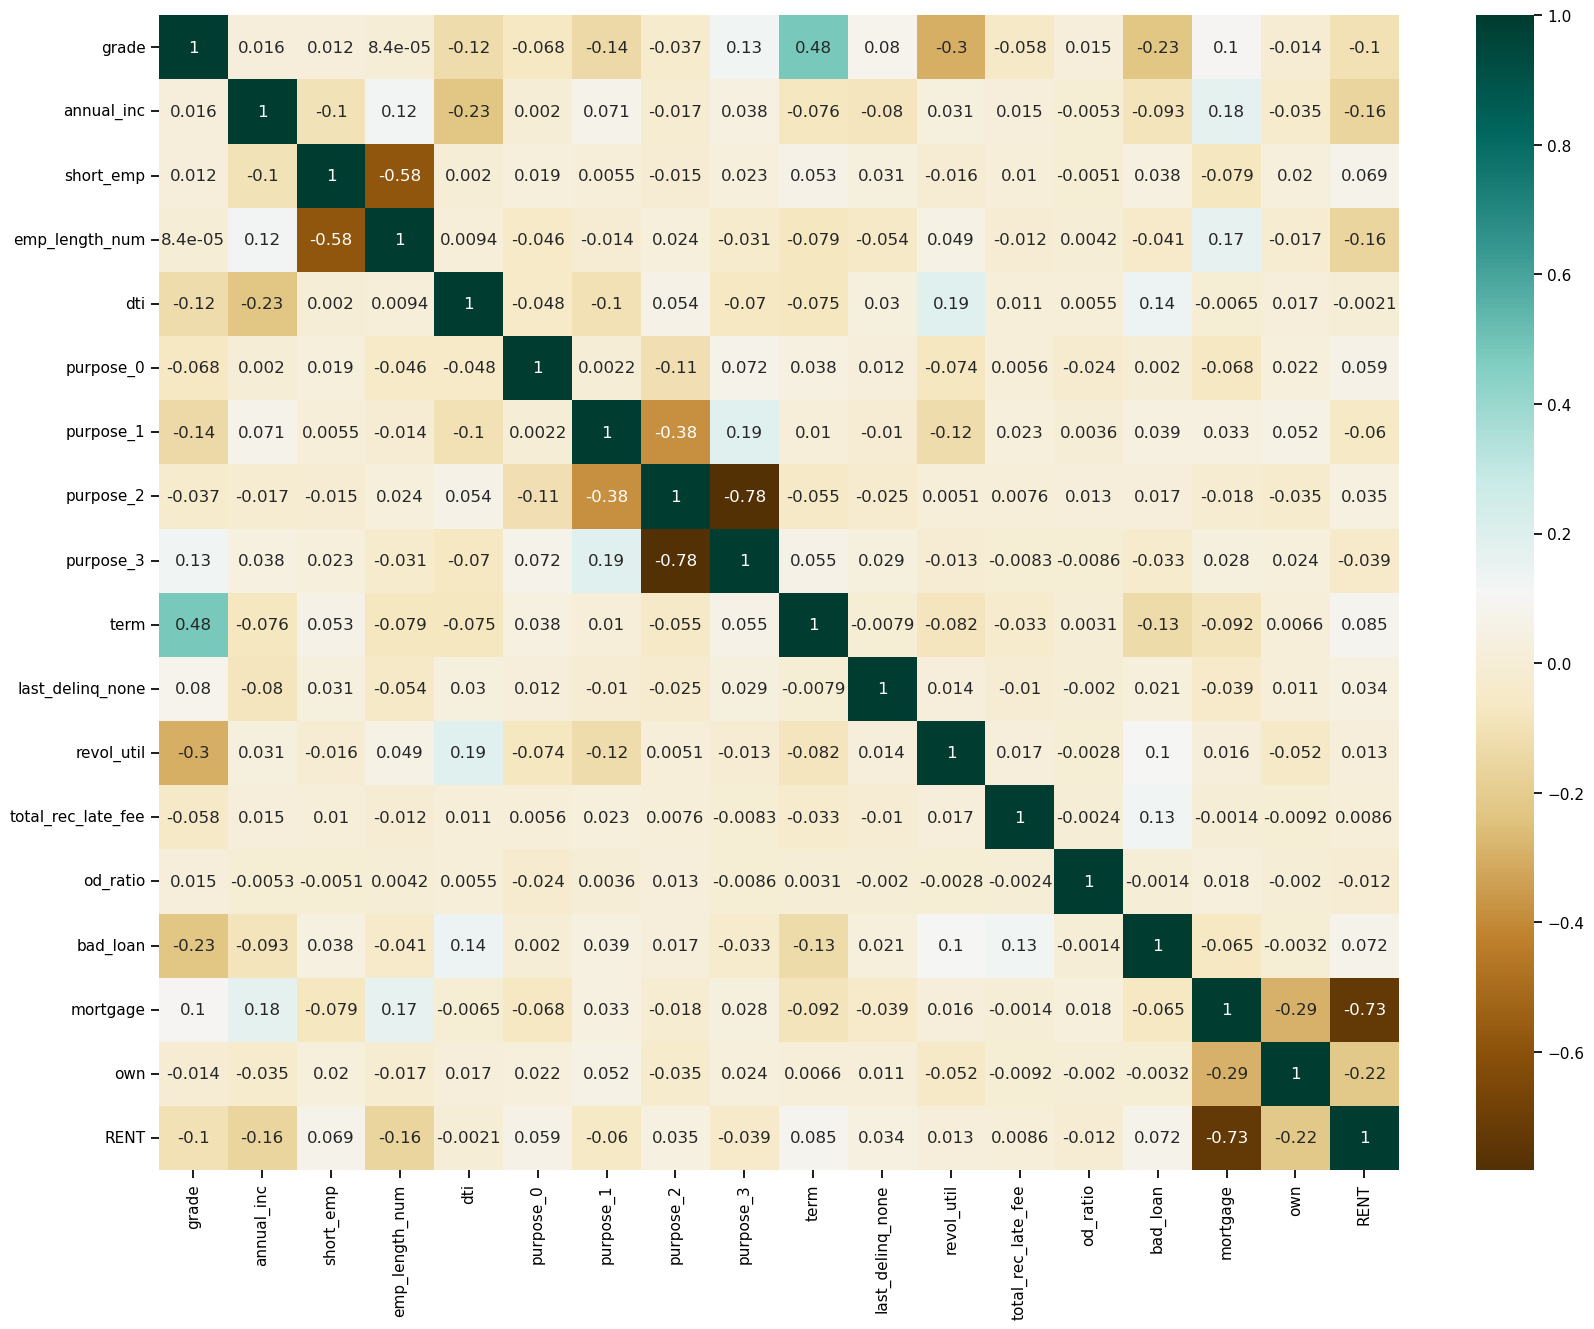

In [141]:
sns.set_context(context="notebook")
fig, ax = plt.subplots(figsize=(20,15))
sns.heatmap(data.corr(),annot=True,cmap="BrBG")
plt.show()
# Correlation not a serious problem here (strong correlation comes from one-hot encoding which is normal)

In [16]:
y = data["bad_loan"]
X = data.drop(["bad_loan"],axis=1)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [18]:
data.columns

Index(['grade', 'annual_inc', 'short_emp', 'emp_length_num', 'dti',
       'purpose_0', 'purpose_1', 'purpose_2', 'purpose_3', 'term',
       'last_delinq_none', 'revol_util', 'total_rec_late_fee', 'od_ratio',
       'bad_loan', 'mortgage', 'own', 'RENT'],
      dtype='object')

In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
normalized_train = pd.DataFrame(sc.fit_transform(X_train),columns=X_train.columns)
normalized_train
normalized_test = pd.DataFrame(sc.transform(X_test),columns=X_test.columns)

The optimal model parameters are LogisticRegression(C=1, class_weight='balanced', random_state=42,
                   solver='newton-cg')
The AUC for logistic regression is 0.7050818488817928
Mean cross-validation accuracy score is 66.02%


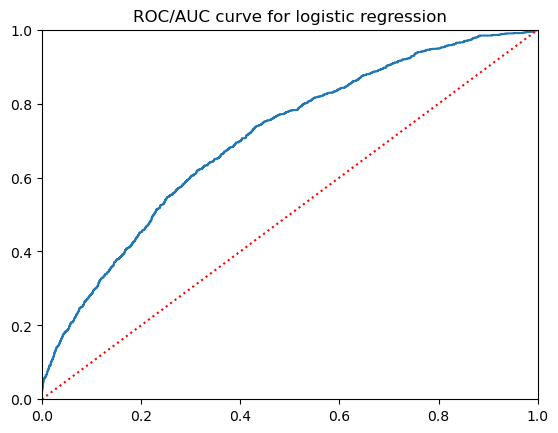

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
lr = LogisticRegression(class_weight='balanced', multi_class='auto', solver='newton-cg',random_state=42)#.fit(normalized_train, y_train)
parameters = {"C":[0.001,0.01,0.1,1,10,100],"penalty":["l1","l2",None]}
clf_lr = GridSearchCV(lr, parameters).fit(normalized_train, y_train)
best = clf_lr.best_estimator_
print(f"The optimal model parameters are {best}")
best.fit(normalized_train, y_train)
lr_test = best.predict_proba(normalized_test)[:,1]
fpr,tpr,_ = roc_curve(y_test,lr_test)
roc_auc = auc(fpr,tpr)
print(f"The AUC for logistic regression is {roc_auc}")
scores = cross_val_score(lr, normalized_train, y_train, cv=10)
print(f'Mean cross-validation accuracy score is {round(scores.mean()*100,2}')
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),":r")
plt.title("ROC/AUC curve for logistic regression")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

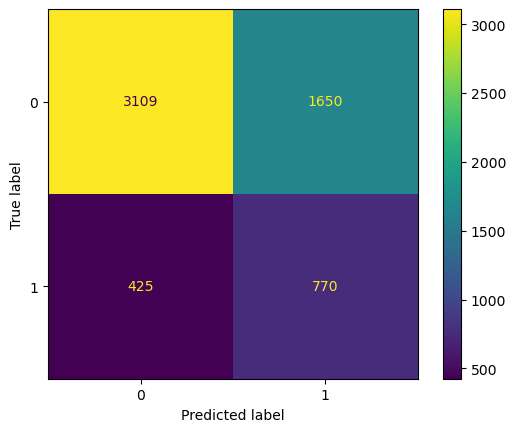

In [37]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, lr.predict(normalized_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

[00:13:26] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
The AUC for XGBoost is 0.6721581922294775
[00:13:27] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:28] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[00:13:29] WARNING: ../src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_

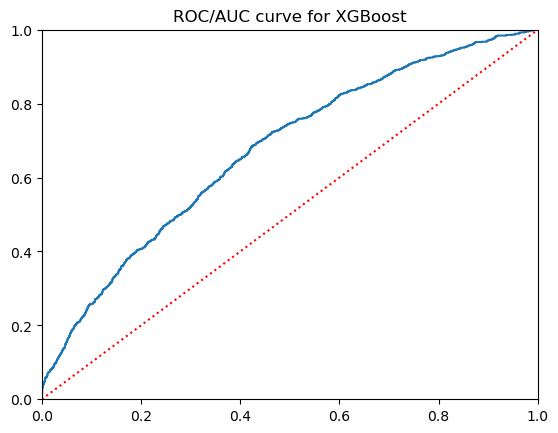

In [61]:
import xgboost
xg = xgboost.XGBClassifier()
xg.fit(normalized_train, y_train)
xg_test = xg.predict_proba(normalized_test)[:,1]
fpr,tpr,_ = roc_curve(y_test,xg_test)
roc_auc = auc(fpr,tpr)
print(f"The AUC for XGBoost is {roc_auc}")
scores = cross_val_score(xg, normalized_train, y_train, cv=10)
print(f'Mean cross-validation accuracy score is {round(scores.mean()*100,2)}%')
plt.title("ROC/AUC curve for XGBoost")
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),":r")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

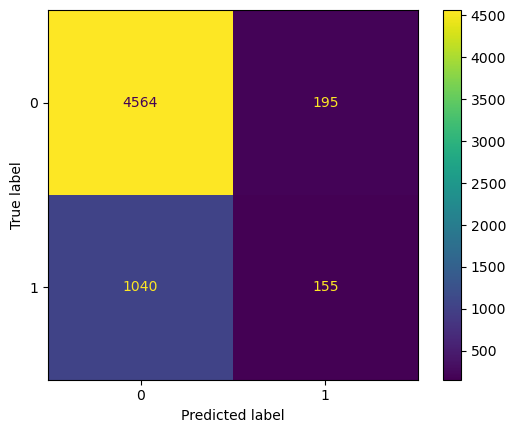

In [62]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, xg.predict(normalized_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The optimal model parameters are RandomForestClassifier(max_depth=9, min_samples_leaf=2, random_state=42)
The AUC for Random Forest is 0.7106413657100705
Mean cross-validation accuracy score is 66.02%


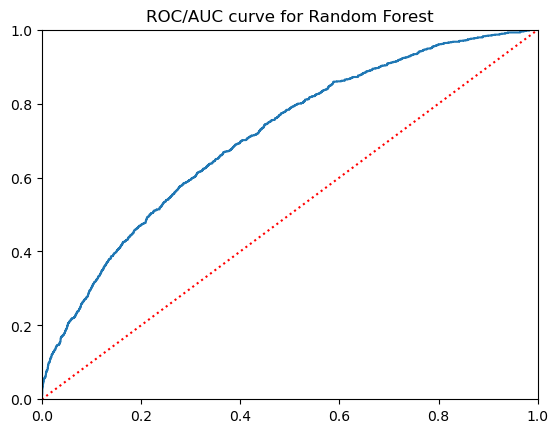

In [46]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_features="auto",bootstrap=True,random_state=42) 
parameters = {"max_depth":[i for i in range(3,10)],"min_samples_split":[i for i in range(2,6)],"min_samples_leaf":[i for i in range(2,6)]}
clf_lr = GridSearchCV(rf, parameters).fit(normalized_train, y_train)
best = clf_lr.best_estimator_
print(f"The optimal model parameters are {best}")
best.fit(normalized_train, y_train)
rf_proba = best.predict_proba(normalized_test)[:,1]
fpr,tpr,_ = roc_curve(y_test,rf_proba)
roc_auc = auc(fpr,tpr)
print(f"The AUC for Random Forest is {roc_auc}")
plt.title("ROC/AUC curve for Random Forest")
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),":r")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()
# Ignore the accuracy score in this cell. It's wrong.

In [55]:
scores = cross_val_score(best, normalized_train, y_train, cv=10)
print(f'Mean cross-validation accuracy score is {round(scores.mean()*100,2)}%')

Mean cross-validation accuracy score is 80.59%


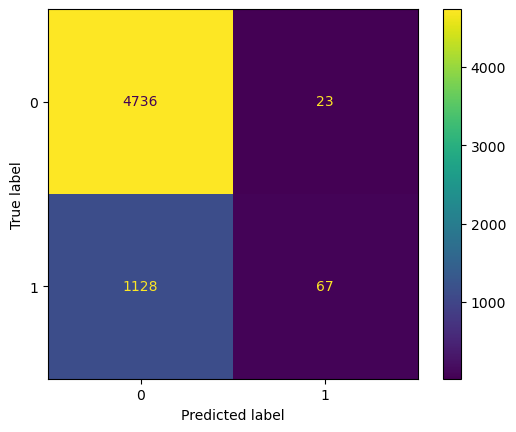

In [50]:
cm = confusion_matrix(y_test, best.predict(normalized_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

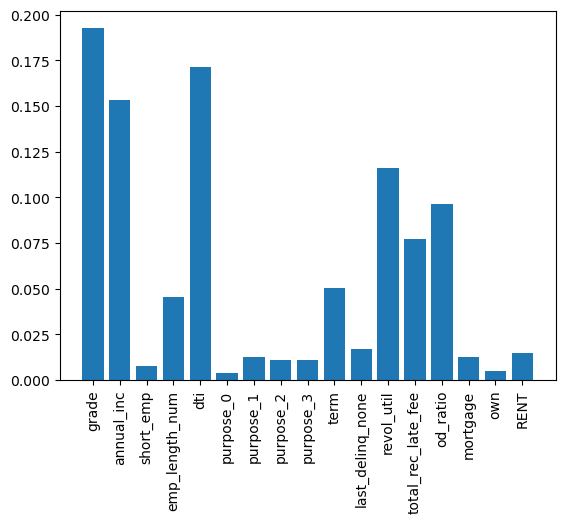

In [52]:
plt.bar(X_train.columns,best.feature_importances_)
plt.xticks(rotation=90)
plt.show()

The AUC for Random Forest is 0.7113883318196486
Mean cross-validation accuracy score is 80.59%


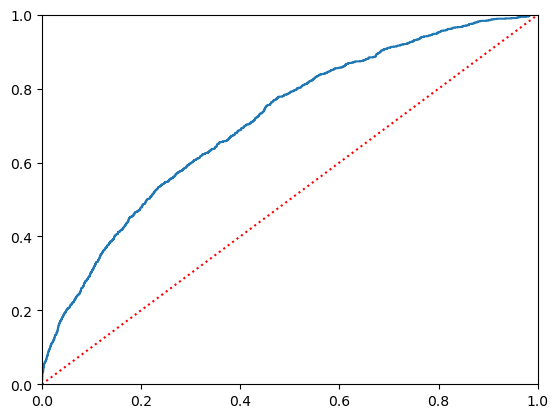

In [54]:
# Try to see if selecting important features will improve performance or not
X_train_sel = normalized_train[["grade","annual_inc","emp_length_num","dti","purpose_1","term","revol_util","total_rec_late_fee","od_ratio","mortgage","RENT"]]
X_test_sel = normalized_test[["grade","annual_inc","emp_length_num","dti","purpose_1","term","revol_util","total_rec_late_fee","od_ratio","mortgage","RENT"]]
rf_sel = RandomForestClassifier(max_depth=9, min_samples_leaf=2, random_state=42) # optimal parameters determined based on trial & error
rf_sel.fit(X_train_sel, y_train)
rf_proba = rf_sel.predict_proba(X_test_sel)[:,1]
fpr,tpr,_ = roc_curve(y_test,rf_proba)
roc_auc = auc(fpr,tpr)
print(f"The AUC for Random Forest is {roc_auc}")
scores = cross_val_score(rf_sel, normalized_train, y_train, cv=10)
print(f'Mean cross-validation accuracy score is {round(scores.mean()*100,2)}%')
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),":r")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

In [58]:
from sklearn.svm import SVC
svc = SVC(random_state=42, class_weight='balanced',probability=True, verbose=True,C=0.1,kernel="rbf")
parameters = {"C":[0.001,0.01,0.1,1,10,100],"degree":[i for i in range(2,6)]}
clf_svc = GridSearchCV(svc, parameters).fit(normalized_train, y_train)
best = clf_svc.best_estimator_
print(f"The optimal model parameters are {best}")
best.fit(normalized_train, y_train)
svc_proba = best.decision_function(normalized_test)
fpr,tpr,_ = roc_curve(y_test,svc_proba)
roc_auc = auc(fpr,tpr)
print(f"The AUC for Support Vector Classification is {roc_auc}")
scores = cross_val_score(svc, normalized_train, y_train, cv=10)
print(f'Mean cross-validation accuracy score is {round(scores.mean()*100,2)}%')
plt.title("ROC/AUC curve for Support Vector Classification")
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),":r")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]The optimal model parameters are

KeyboardInterrupt: 

The optimal model parameters are SVC(C=100, class_weight='balanced', degree=2, probability=True, random_state=42,
    verbose=True)
[LibSVM]The AUC for Support Vector Classification is 0.6314835313139341
[LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM][LibSVM]Mean cross-validation accuracy score is 66.05%


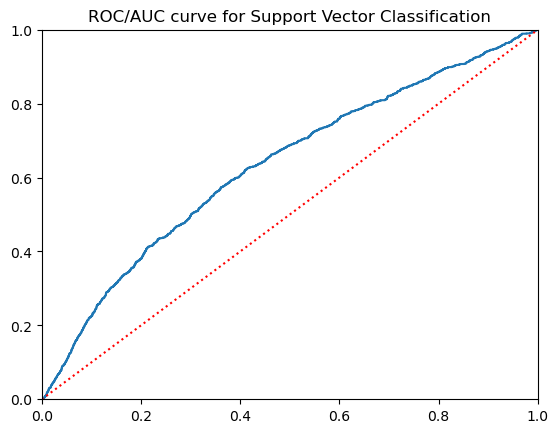

In [60]:
print(f"The optimal model parameters are {best}")
best.fit(normalized_train, y_train)
svc_proba = best.decision_function(normalized_test)
fpr,tpr,_ = roc_curve(y_test,svc_proba)
roc_auc = auc(fpr,tpr)
print(f"The AUC for Support Vector Classification is {roc_auc}")
scores = cross_val_score(best, normalized_train, y_train, cv=10)
print(f'Mean cross-validation accuracy score is {round(scores.mean()*100,2)}%')
plt.title("ROC/AUC curve for Support Vector Classification")
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),":r")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

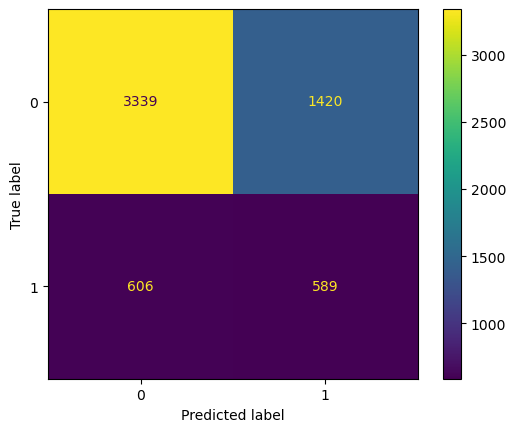

In [63]:
cm = confusion_matrix(y_test, best.predict(normalized_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()

The optimal model parameters are KNeighborsClassifier(n_neighbors=29)
Mean cross-validation accuracy score is 80.45%
Optimal AUC score is 0.7113883318196486


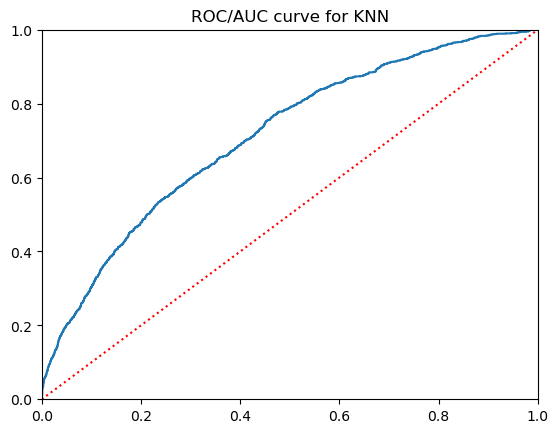

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
parameters = {"n_neighbors":[i for i in range(3,50,2)]}
clf_knn = GridSearchCV(knn, parameters).fit(normalized_train, y_train)
best = clf_knn.best_estimator_
print(f"The optimal model parameters are {best}")
best.fit(normalized_train, y_train)
knn_proba = best.predict_proba(normalized_test)[:,1]
scores = cross_val_score(best, normalized_train, y_train, cv=10)
print(f'Mean cross-validation accuracy score is {round(scores.mean()*100,2)}%')
fpr,tpr,_ = roc_curve(y_test,rf_proba)
roc_auc = auc(fpr,tpr)
print(f"Optimal AUC score is {roc_auc}")
plt.title("ROC/AUC curve for KNN")
plt.plot(fpr,tpr)
plt.plot(np.linspace(0,1,100),np.linspace(0,1,100),":r")
plt.xlim(0,1)
plt.ylim(0,1)
plt.show()

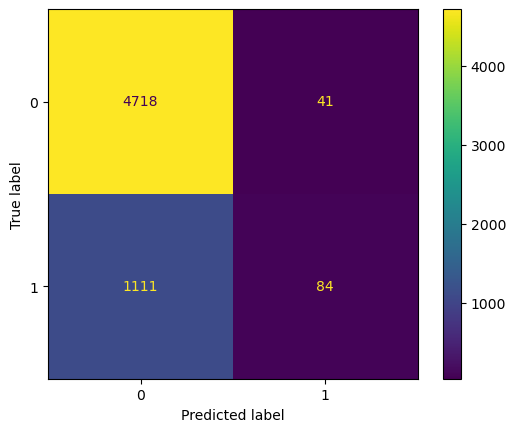

In [71]:
cm = confusion_matrix(y_test, best.predict(normalized_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()